# ZZ to 4 leptons analysis with CMS open data and ADL/CutLang

This is an exercise showing a simple analysis exploring the ZZ -> 4 lepton final state, focusing on the e+e-μ+μ- channel.  The analysis aims to explore the kinematics of ZZ --> e+e-μ+μ- events.

The analysis is performed based on CMS open data MC ntuples.

The analysis consists of two parts:
1. Applying some event selection to the input events and making distributions.  This part is performed using a special language called ADL, and via a software called CutLang that can read and process ADL.
2. Drawing plots produced by the previous step.  This part is performed using ROOT (with Python syntax).  ROOT is the main analysis software used at CERN.


In [ ]:
!wget --progress=dot:giga https://www.dropbox.com/s/hak5sqxamgkrfa2/ZZTo2e2mu.root
// Get the ROOT file containing the ZZ -> eemumu background events

## What are ADL and CutLang?

(More information on [cern.ch/adl](cern.ch/adl))

LHC data analyses are usually performed using complex analysis frameworks written in general purpose languages like C++ and python. 
But this method has a steep learning curve, as even the simplest tasks could be coded in a complicated way, and it is not straightforward to understand the code, make changes or additions.
However there is another emerging alternative which allows to decouple physics content from the technical code and write analyses with a simple, self-describing syntax.  **Analysis Description Language (ADL)** is a HEP-specific analysis language developed with this purpose. 

A HEP analysis includes 3 main parts:
  * Object definitions: Which objects are used? e.g. electrons? muons? jets?  What are the selections applied on these?
  * Event variable definitions: Are there event-wide variables used such as a invariant mass or a transverse mass?  How are they calculated?
  * Event selections: What selections do we apply on events, for example, to enhance the signal and reduce the backgrounds?  Are there more than one event selections?  How are they defined?

ADL consists of blocks separating object, variable and event selection definitions for a clear separation of analysis components. Blocks have a keyword-expression structure. Keywords specify analysis concepts and operations.  Syntax includes mathematical and logical operations, comparison and optimization operators, reducers, 4-vector algebra and HEP-specific functions (dφ, dR, …).

ADL is designed with the goal to be self-describing, so especially for simple cases like in this example, one does not need to read syntax rules to understand an ADL description.  However if you are interested, the set of syntax rules can be found [here]( https://twiki.cern.ch/twiki/bin/view/LHCPhysics/ADL).

Once an analysis is written it needs to be run on events.  This is achieved by **CutLang** , the runtime interpreter who reads and understands the ADL syntax and runs it on events.  CutLang is also a framework which aturomatically handles many tedious tasks as reading input events, writing output histograms, etc.  CutLang can be run on various environments such as linux, mac, conda, docker, jupyter, etc.  

In case you are interested to learn more on CutLang, please see the [CutLang github](https://github.com/unelg/CutLang)


## Writing the analysis with ADL and running with CutLang

**Writing the analysis with ADL:** In the following cell, part of the analysis is written using the ADL syntax.  However there are some parts missing. Please follow the instructions in the comments to complete the missing parts.  If you feel adventurous, you could modify the object or event selections, add new variables or new histograms.

**Running the analysis with CutLang:** Executing the cell will run the analysis on both the signal (SMHiggsToZZTo4L.root) and background (ZZTo2e2mu.root) events.  The run parameters are given in the first line of the cell:
  * file : input root file
  * filetype : input event format (do not change!)
  * adlfile : the name we use for labeling the analysis 
  * events : number of events used from each file
  * verbose : frequency of processed event numbers written in output text

NOTE: When running jupyter/binder via direct link, if your run does not complete due to memory issues, please reduce the number of events via the "events" parameter.

**Analysis output:** Running the analysis will produce two outputs:
  * Text output shown cell output: This includes "cutflows" for each region, i.e. the selections applied and how many events survive the various selections.  Histograms are also listed.  You should see a separate output for each ROOT file that is run.
  * ROOT output: One ROOT file called histoOut-\<adlfile name\>-\<file name\>.root that includes all the histograms produced by the analysis.  These ROOT files will be used in the next step.

In [2]:
%%cutlang file=ZZTo2e2mu.root filetype=CMSODR2 adlfile=ZZ4L events=100000 verbose=20000

# ADL file for ZZ->eemumu analysis

# Object selection
# Take input electrons, labeled "ele" and obtain a set of selected electrons "elesel"
object elesel
  take ele
  select pT(ele) > 20
  select abs(eta(ele)) < 2.5

# Take input muons, labeled "muo" and obtain a set of selected muons "muosel"
object muosel
  take muo
  select pT(muo) > 20
  select abs(eta(muo)) < 2.4

# Event selection
    
# Select all events and make histograms of lepton multiplicities
region overview
  select ALL # to count all events
  histo hneinp, "number of input electrons", 10, 0, 10, size(ele)
  histo hnesel, "number of selected electrons", 10, 0, 10, size(elesel)
  histo hnminp, "number of input muons", 10, 0, 10, size(muo)
  histo hnmsel, "number of selected muons", 10, 0, 10, size(muosel)
  histo hnenminp, "number of input electrons vs muons", 10, 0, 10, 10, 0, 10, size(ele), size(muo)
  histo hnenmsel, "number of selected electrons vs muons", 10, 0, 10, 10, 0, 10, size(elesel), size(muosel)

# Selection requiring 1 Z->ee in the event using input electrons
region rZeeinp
  select ALL
  select size(ele) == 2
  select q(ele[0]) + q(ele[1]) == 0
  histo hZeeinp, "Z(->ee,inp) candidate mass (GeV)", 50, 50, 150, m(ele[0] ele[1])

# Selection requiring 1 Z->mumu in the event using selected electrons
region rZeesel
  select ALL
  select size(elesel) == 2
  select q(elesel[0]) + q(elesel[1]) == 0
  histo hZeesel, "Z(->ee,sel) candidate mass (GeV)", 50, 50, 150, m(elesel[0] elesel[1])

# Can you write here the 2 regions requiring 1 Z->mumu in the event?
region rZmminp
  select ALL
  select size(muo) == 2
  select q(muo[0]) + q(muo[1]) == 0
  histo hZmminp, "Z(->mm,inp) candidate mass (GeV)", 50, 50, 150, m(muo[0] muo[1])

region rZmmsel
  select ALL
  select size(muosel) == 2
  select q(muosel[0]) + q(muosel[1]) == 0
  histo hZmmsel, "Z(->mm,sel) candidate mass (GeV)", 50, 50, 150, m(muosel[0] muosel[1])

# Now let's apply a selection with 2Zs, Z->ee and Z->mumu
region rZeemminp
  select ALL
  select size(ele) == 2 and size(muo) == 2
  select q(ele[0]) + q(ele[1]) == 0
  select q(muo[0]) + q(muo[1]) == 0
  histo hZeeinp, "Z(->ee,inp) candidate mass (GeV)", 50, 50, 150, m(ele[0] ele[1])
  histo hZmminp, "Z(->mm,inp) candidate mass (GeV)", 50, 50, 150, m(muo[0] muo[1])
  # Can you make a 2D histogram plotting m(ee) vs m(mumu) ?
  # histo hZeemminp,  
  histo hZeemminp, "Z(->ee,inp) vs Z(->mm,inp) candidate mass (GeV)", 50, 50, 150, 50, 50, 150, m(ele[0] ele[1]), m(muo[0] muo[1])

# Can you write the same region using the selected electrons and muons?
region rZeemmsel
  select ALL
  select size(elesel) == 2 and size(muosel) == 2
  select q(elesel[0]) + q(elesel[1]) == 0
  select q(muosel[0]) + q(muosel[1]) == 0
  histo hZeesel, "Z(->ee,sel) candidate mass (GeV)", 50, 50, 150, m(elesel[0] elesel[1])
  histo hZmmsel, "Z(->mm,sel) candidate mass (GeV)", 50, 50, 150, m(muosel[0] muosel[1])
  # Can you make a 2D histogram plotting m(ee) vs m(mumu) ?
  # histo hZeemmsel = 
  histo hZeemmsel, "Z(->ee,sel) vs Z(->mm,sel) candidate mass (GeV)", 50, 50, 150, 50, 50, 150, m(elesel[0] elesel[1]), m(muosel[0] muosel[1])



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Analysis for /tmp/ZZ4L-ZZTo2e2mu.adl
RUN -> CLA ZZTo2e2mu.root CMSODR2 -i /tmp/ZZ4L-ZZTo2e2mu.adl -e 100000 -s 0 -v 20000

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
/opt/anaconda3/envs/CL3/bin/cutlang/runs/CLA
/opt/anaconda3/envs/CL3/bin/cutlang/runs
/opt/anaconda3/envs/CL3/bin/cutlang
Analysis with Multiple Regions
A region, ID:  0 named:          [overview] 	 is defined in lines from 1 to 10
A region, ID:  1 named:           [rZeeinp] 	 is defined in lines from 10 to 16
A region, ID:  2 named:           [rZeesel] 	 is defined in lines from 16 to 22
A region, ID:  3 named:           [rZmminp] 	 is defined in lines from 22 to 28
A region, ID:  4 named:           [rZmmsel] 	 is defined in lines from 28 to 34
A region, ID:  5 named:         [rZeemminp] 	 is defined in lines from 34 to 43
A region, ID:  6 named:         [rZeemmsel] 	 is defined in lines from 43 to 51
/opt/anaconda3/envs/CL3/bin/cutlang/CLA/CLA.exe ZZTo2e2mu.root -inp CMSODR2 -BP 7 -EVT 100000 -V 

## Checking the analysis output with ROOT

Now let's make some plots using the ROOT package in python (which is widely used at CERN).
Instructions are shown within comments in the following cells.

What to do:
  * Compare some of the histograms you made:
    * Electrons vs. muons
    * Input leptons vs. selected leptons
    * Different selection regions

In [3]:
%%python
# Let's start with importing the needed modules
from ROOT import gStyle, TFile, TH1, TH1D, TH2D, TCanvas, TLegend, TColor

# Now let's set some ROOT styling parameters:
# You do not need to know what they mean, but can directly use these settings

gStyle.SetOptStat(0)
gStyle.SetPalette(1)

gStyle.SetTextFont(42)

gStyle.SetTitleStyle(0000)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleFont(42)
gStyle.SetTitleFontSize(0.055)

gStyle.SetTitleFont(42, "xyz")
gStyle.SetTitleSize(0.5, "xyz")
gStyle.SetLabelFont(42, "xyz")
gStyle.SetLabelSize(0.45, "xyz")


In [4]:
%%python
# Let's open the output file produced by CutLang: 
# (If you changed the adlfile option when running cutlang, you will need to change the file names)
f = TFile("histoOut-ZZ4L-ZZTo2e2mu.root")

In [5]:
%%python 
# We can see what is inside the signal file:
f.ls()
# There should be a directory (TDirectoryFile) per selection region, e.g. for "baseline" and "twojets":

TFile**		histoOut-ZZ4L-ZZTo2e2mu.root	
 TFile*		histoOut-ZZ4L-ZZTo2e2mu.root	
  KEY: TDirectoryFile	overview;1	overview
  KEY: TDirectoryFile	rZeeinp;1	rZeeinp
  KEY: TDirectoryFile	rZeesel;1	rZeesel
  KEY: TDirectoryFile	rZmminp;1	rZmminp
  KEY: TDirectoryFile	rZmmsel;1	rZmmsel
  KEY: TDirectoryFile	rZeemminp;1	rZeemminp
  KEY: TDirectoryFile	rZeemmsel;1	rZeemmsel


In [ ]:
%%python
# Let's check out what is inside "baseline":
f.cd("rZeeinp")
f.ls()

In [6]:
%%python

# Get the histograms
# Overview region:
hneinp = f.Get("overview/hneinp")
hnminp = f.Get("overview/hnminp")
hnesel = f.Get("overview/hnesel")
hnmsel = f.Get("overview/hnmsel")
hnenminp = f.Get("overview/hnenminp")
hnenmsel = f.Get("overview/hnenmsel")

# Zeeinp region
hZeeinp = f.Get("rZeeinp/hZeeinp")
# Zeesel region
hZeesel = f.Get("rZeesel/hZeesel")
# Zmminp region
hZmminp = f.Get("rZmminp/hZmminp")
# Zmmsel region
hZmmsel = f.Get("rZmmsel/hZmmsel")
# Zeemminp region
hZeeinp2 = f.Get("rZeemminp/hZeeinp")
hZmminp2 = f.Get("rZeemminp/hZmminp")
hZeemminp = f.Get("rZeemminp/hZeemminp")
# Zeemmsel region
hZeesel2 = f.Get("rZeemmsel/hZeesel")
hZmmsel2 = f.Get("rZeemmsel/hZmmsel")
hZeemmsel = f.Get("rZeemmsel/hZeemmsel")

In [7]:
%%python

# In order to be able to make many plots, let's define two generic histogrms to which we can 
# assign any of the histograms above:
h1 = hneinp
h2 = hnminp

# Now we format the histograms: lines, colors, axes titles, etc..  
# You do not need to learn the commands here unless you are really curious.
# Otherwise just execute the cell.

# Color numbers can be retrived from https://root.cern.ch/doc/master/classTColor.html
# (check for color wheel)
h1.SetLineColor(600) # kBlue
h2.SetLineColor(416+2) # kGreen + 2

# Titles, labels.  
# It is enough to set these variables ONLY FOR THE FIRST HISTOGRAM YOU WILL DRAW
# i.e., the one you will call by .Draw().  The rest you will draw by .Draw("same") will only 
# contribute with the historam curve.

# Make the x-axis title:
rawtitle = h1.GetTitle()
if ("electron" in rawtitle): 
    title = rawtitle.replace("electron", "lepton")
elif ("muon" in rawtitle): 
    title = rawtitle.replace("muon", "lepton")
elif ("ee" in rawtitle): 
    title = rawtitle.replace("ee", "ll")
elif ("mm" in rawtitle): 
    title = rawtitle.replace("mm", "ll")
print(title)
    
h1.SetTitle("")
h1.GetXaxis().SetTitle(title)
h1.GetXaxis().SetTitleOffset(1.25)
h1.GetXaxis().SetTitleSize(0.05)
h1.GetXaxis().SetLabelSize(0.045)
h1.GetXaxis().SetNdivisions(8, 5, 0)
h1.GetYaxis().SetTitle("number of events")
h1.GetYaxis().SetTitleOffset(1.4)
h1.GetYaxis().SetTitleSize(0.05)
h1.GetYaxis().SetLabelSize(0.045)

# Set the maximum of the y axis:
if (h2.GetMaximum()>h1.GetMaximum()):
    h1.SetMaximum(h2.GetMaximum()*1.1)
    
# Make a generically usable legend
l = TLegend(0.65, 0.75, 0.88, 0.87)
l.SetBorderSize(0)
l.SetFillStyle(0000)
# You can change the legend titles from here based on what you are plotting
l.AddEntry(h1,h1.GetName(), "l")
l.AddEntry(h2,h2.GetName(), "l")

"number of input leptons"


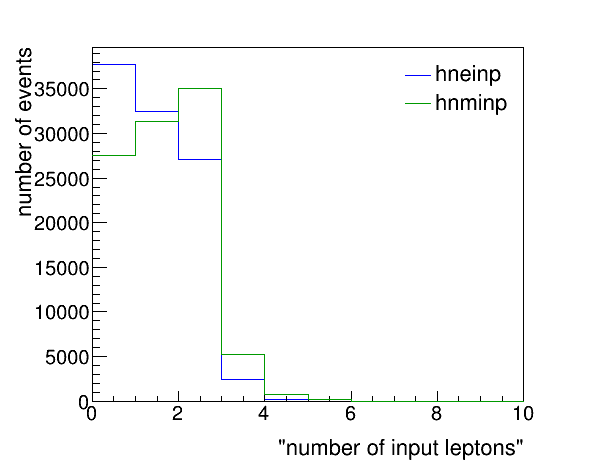

input_line_96:2:3: error: use of undeclared identifier 'None'
 (None)
  ^
Error in <HandleInterpreterException>: Error evaluating expression (None).
Execution of your code was aborted.


In [8]:
%%python %jsroot on
# Now we make a canvas and draw our histograms
c = TCanvas("c", "c", 620, 500)
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.15)
c.SetRightMargin(0.15)
h1.Draw()
h2.Draw("same")
l.Draw("same")
c.Draw()
# Don't worry about the error that appears below!

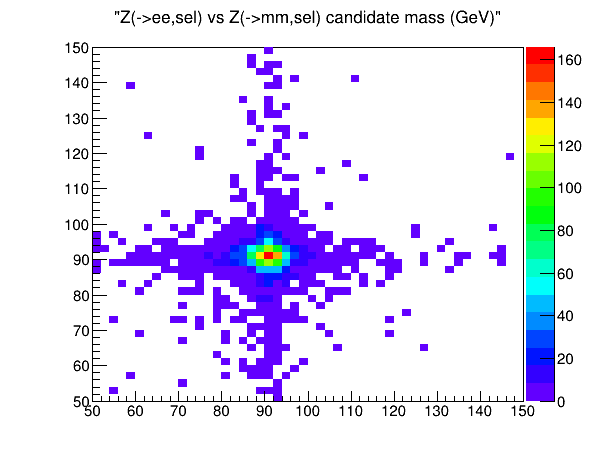

input_line_124:2:3: error: use of undeclared identifier 'None'
 (None)
  ^
Error in <HandleInterpreterException>: Error evaluating expression (None).
Execution of your code was aborted.


In [9]:
%%python %jsroot on
c2 = TCanvas("c2", "c2", 620, 500)
c2.SetBottomMargin(0.15)
c2.SetLeftMargin(0.15)
c2.SetRightMargin(0.15)
hZeemmsel.Draw("colz")
c2.Draw()
# Don't worry about the error that appears below!